NEURAL NETWORK (using hand written digit dataset) 

1. Importing Libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random

2. Importing Datasets

In [56]:
X_train = np.loadtxt('dataset/train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('dataset/train_label.csv', delimiter = ',').T

In [57]:
X_test = np.loadtxt('dataset/test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('dataset/test_label.csv', delimiter = ',').T

In [58]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


The shape of X should be (784, 1000), 
And that of Y should be (10, 1000)
Here,
* 784 = total number of features
* 1000 = total number of observations in dataset
* 10 = number of output classes

3. Visualizing Dataset

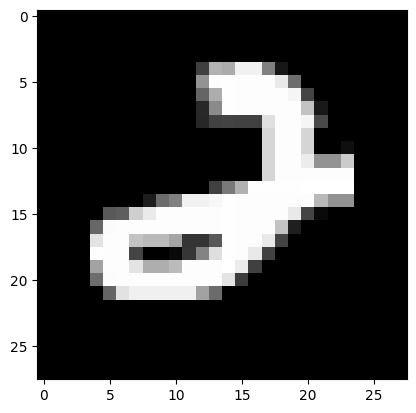

In [59]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

Activation Functions

In [60]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [61]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

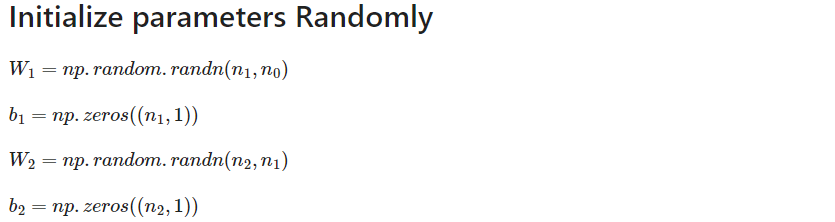

In [62]:
def initialize_parameters(n_x, n_h, n_y):
    #np.random.randn(a, b) --->  return a numpy array of shape(a, b) with small random values    
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2 
    }
    
    return parameters

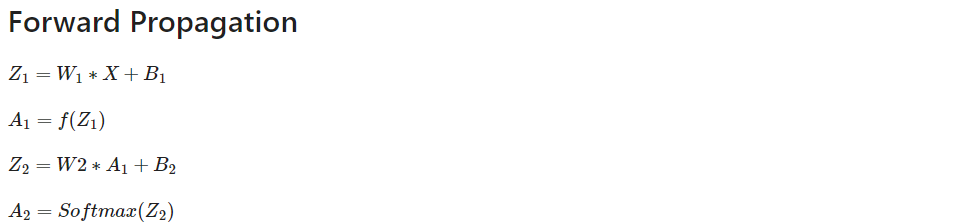

For f(z1), using either tanh or ReLU activation function (using the same for Backpropagation as well)

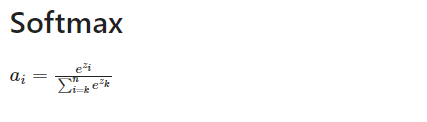

In [63]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

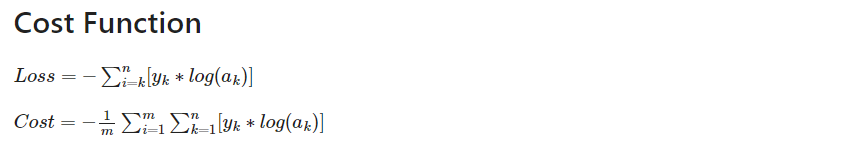

In [64]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    return cost

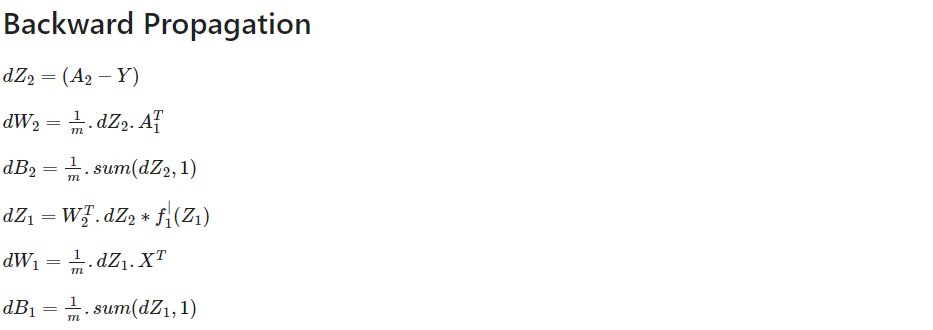

In [65]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

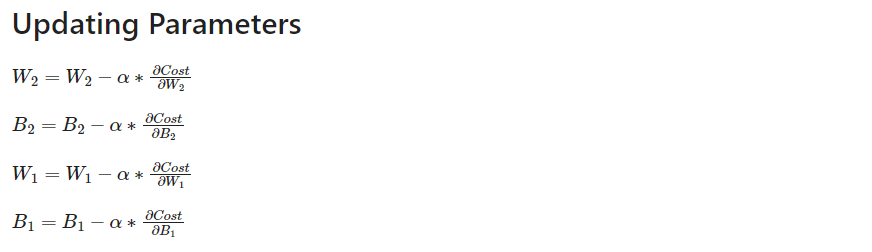

In [66]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [67]:

def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    #initialize parameter
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        #forward propagation
        forward_cache = forward_propagation(x, parameters)
        #cost function
        cost = cost_function(forward_cache['a2'], y)
        #back propagation
        gradients = backward_prop(x, y, parameters, forward_cache)
        #update parameter
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

4. Initialize the parameters and Train the model 

In [68]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.344185953815397


Cost after 10 iterations is : 1.1899172349692257
Cost after 20 iterations is : 0.8349870067391804
Cost after 30 iterations is : 0.6669903616341439
Cost after 40 iterations is : 0.5658406764843424
Cost after 50 iterations is : 0.4962926876502823
Cost after 60 iterations is : 0.4444654940179154
Cost after 70 iterations is : 0.4037370930163188
Cost after 80 iterations is : 0.3705158075187521
Cost after 90 iterations is : 0.3426675972462318


4. After training the model for 100 iterations, we Plotting cost vs iteration graph 
(we can clearly see the minimizing value of cost over iterations, that's why we get goos prediction value)

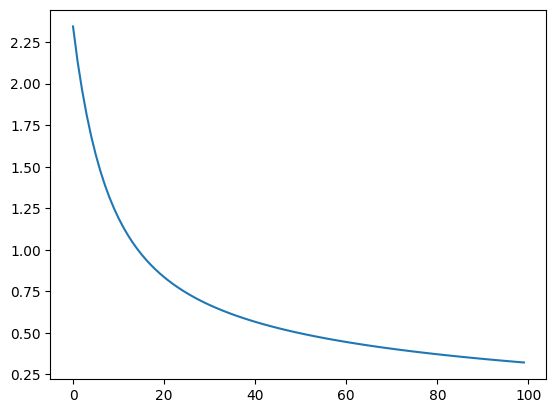

In [69]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [70]:
#check model accuracy
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

5. Calculating train and test accuracy

In [71]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 95.6 %
Accuracy of Test Dataset 84.0 %


6. Predicting a test data with visualization

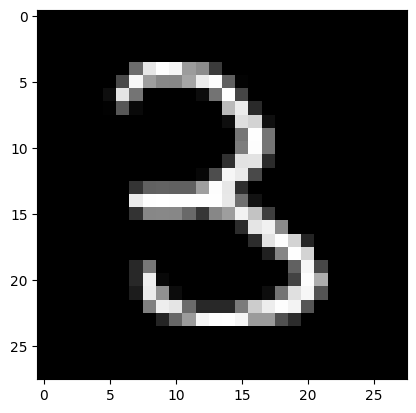

Predicted hand written digit to be --->  3


In [72]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Predicted hand written digit to be ---> ", a_pred[0])